## Week 8 task by Denis Khryashchev

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os.path
from sklearn import manifold
import matplotlib.image as mpimg
from matplotlib import offsetbox
%matplotlib inline

In [2]:
# URL of the data and its local name
CSV_URL = "https://pjreddie.com/media/files/mnist_train.csv"
local_csv = "mnist_train.csv"

In [3]:
# Checking if we have already downloaded the data
if not os.path.isfile("mnist_train.csv"):
    pd.read_csv(CSV_URL, header = None).to_csv("mnist_train.csv")

In [4]:
def process_digit(digit_):
    # Function to map the data onto the grid
    # 128 stands for granularity: the bigger, the less digits are plotted,
    # picked arbitrarily as a multiple of 28 (original image's dimensions)
    def coord2grid(xy, min_x, min_y):
        x = (int(round(xy[0])) - min_x) // 112
        y = (int(round(xy[1])) - min_y) // 112
        return [int(x), int(y)]
    
    # Function to plot digits corresponding to the original images based on their MDS projections
    def plot_digits(coordinates, images):
    
        fig, ax = plt.subplots(figsize = (25, 25))

        ax.plot(coordinates[:, 0], coordinates[:, 1], '.k')
        for i in range(len(images)):
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap = "gray_r"), coordinates[i])
            ax.add_artist(imagebox)
    
    # Loading the dataset iteratively, filtering only digit '0'
    csv_iterator = pd.read_csv(local_csv, iterator = True, chunksize = 5000)
    digit = pd.concat([portion[portion[portion.columns[1]] == digit_] for portion in csv_iterator])
    
    # Dropping the extra index and the label columns
    digit = digit.drop(digit.columns[0], axis = 1)
    digit = digit.drop(digit.columns[0], axis = 1)

    # Proper indexing
    digit = digit.reset_index(drop = True)

    # Taking exactly 5000 observations
    digit = digit.head(5000)
    
    # Creating the numpy array for ICA and clustering
    X = digit.as_matrix()
    
    # MDS  embedding of the digits dataset
    clf = manifold.MDS(n_components = 2, n_init = 1, max_iter = 100)
    X_proj = clf.fit_transform(X)
    print("Done. Stress: %f" % clf.stress_)
    
    # Calculating the boundaries of the data
    X_proj_T = np.transpose(X_proj)
    min_x = np.min(X_proj_T[0])
    max_x = np.max(X_proj_T[0])
    min_y = np.min(X_proj_T[1])
    max_y = np.max(X_proj_T[1])
    min_x = int(round(min_x))
    min_y = int(round(min_y))
    max_x = int(round(max_x))
    max_y = int(round(max_y))
    print "x between", min_x, max_x
    print "y between", min_y, max_y
    
    # Dictionary for grid occupance
    grid = {}
    for i in range(len(X_proj)):
        xy = coord2grid(X_proj[i], min_x, min_y)
        key = str(xy)
        if key not in grid:
            grid[key] = list(X_proj[i]) + [i]
        else:
            mid_x = min_x + xy[0]*112+56
            mid_y = min_y + xy[1]*112+56
            if np.sqrt((mid_x - X_proj[i][0])**2 + (mid_y - X_proj[i][1])**2) < \
                    np.sqrt((mid_x - grid[key][0])**2 + (mid_y - grid[key][1])**2):
                grid[key] = list(X_proj[i]) + [i]
                
    # Extracting the indices
    indices = map(int, np.transpose(grid.values())[-1])

    # Extracting coordinates
    coordinates = np.transpose(np.transpose(grid.values())[:-1])
    
    # Selecting representative images, reshaping to squares for further plotting
    images = [X[i].reshape(28, 28) for i in indices]
    
    # Plotting the images corresponding to their projections
    plot_digits(coordinates, images)

Processing digit  0 

Done. Stress: 9741141149190.734375
x between -3009 2643
y between -2800 2684


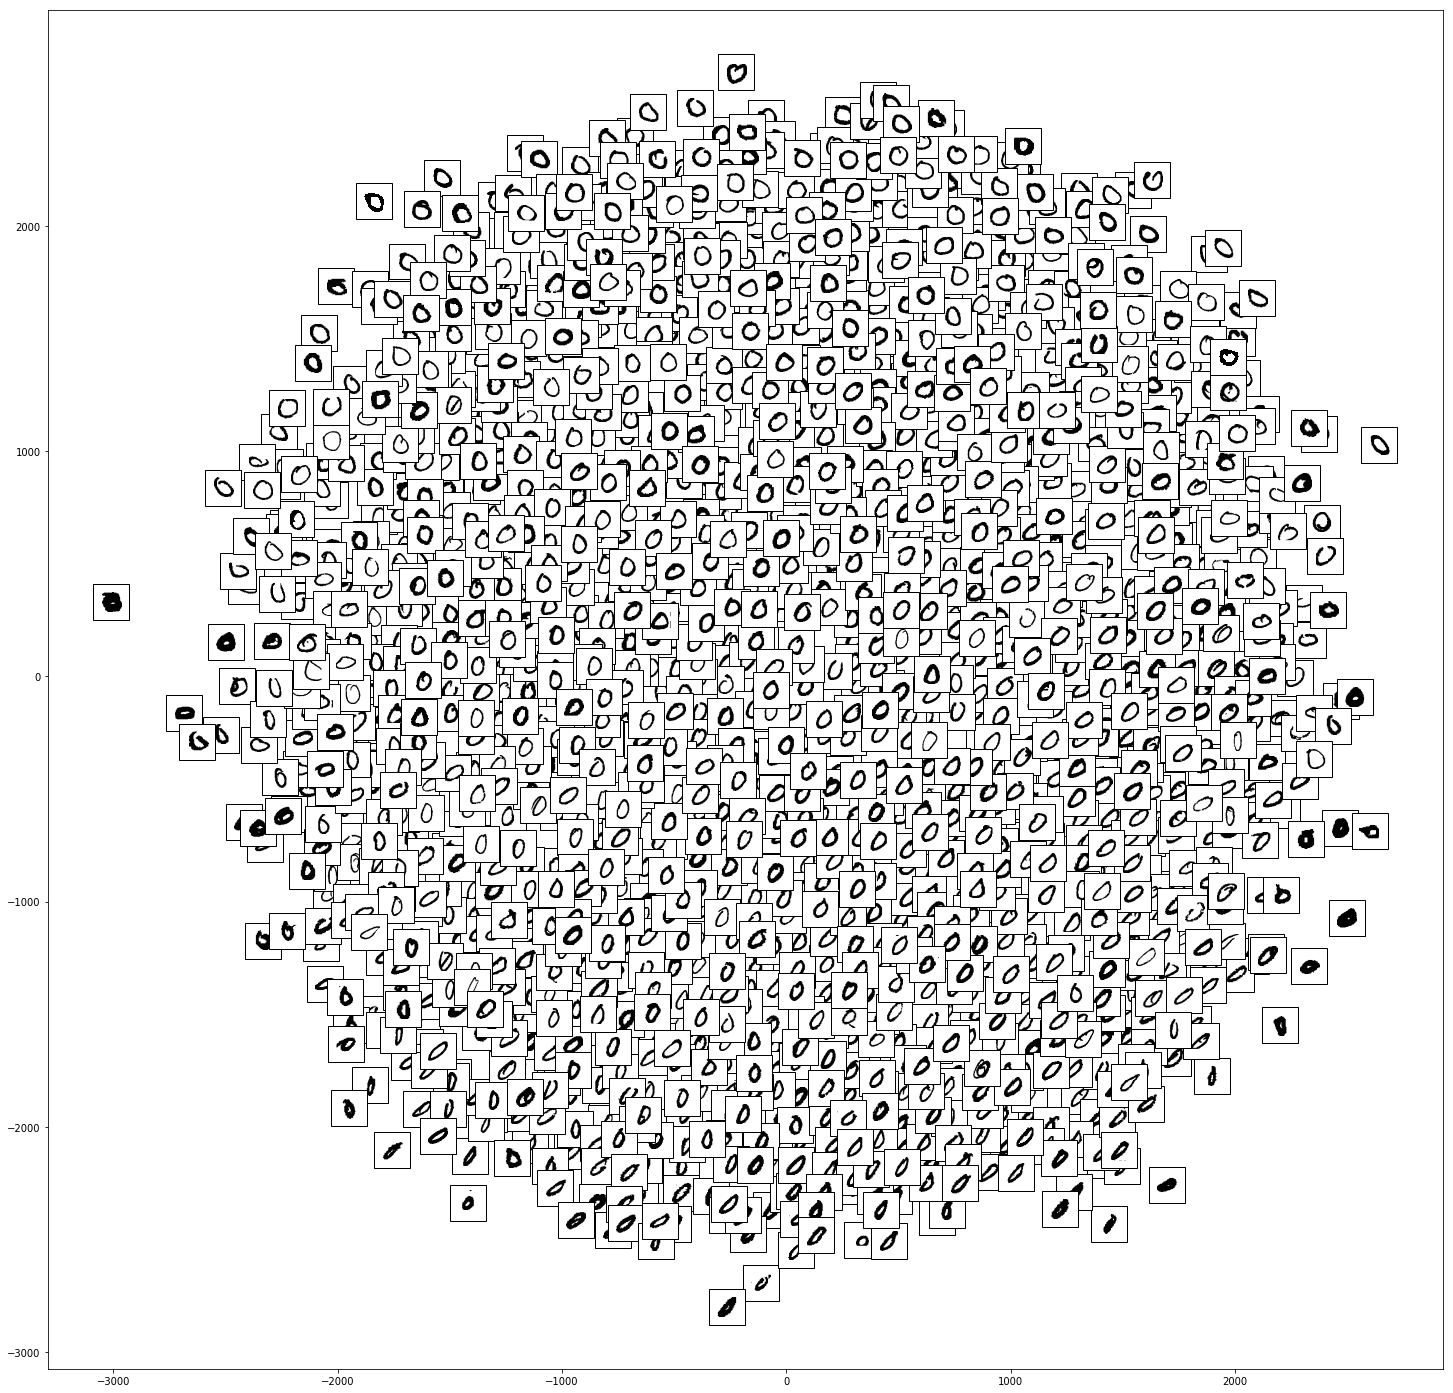

In [6]:
# Plotting all the digits. Might take a while
digit = 0
print "Processing digit ", digit, "\n"
process_digit(digit)

Processing digit  1 

Done. Stress: 2488886549046.034668
x between -2148 2053
y between -2582 2325


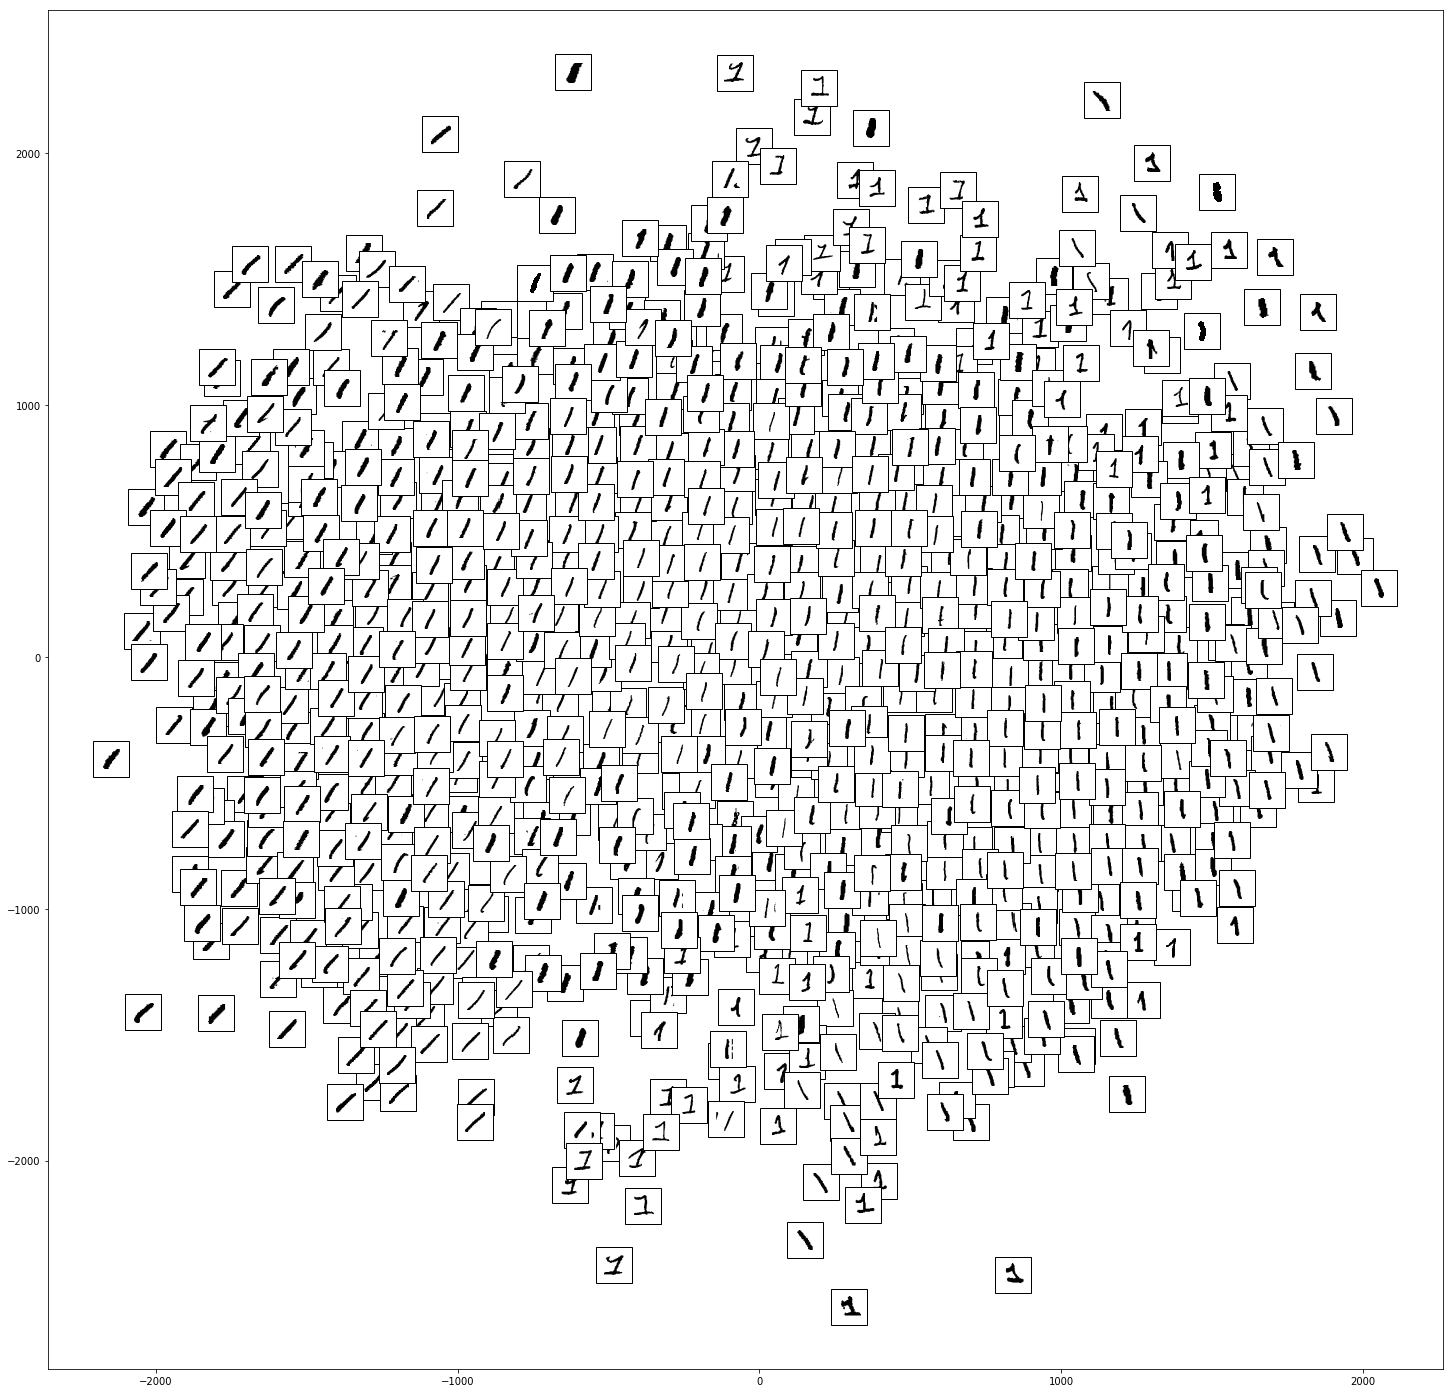

In [7]:
# Plotting all the digits. Might take a while
digit = 1
print "Processing digit ", digit, "\n"
process_digit(digit)

Processing digit  2 

Done. Stress: 13105210815471.443359
x between -2607 2735
y between -2674 2768


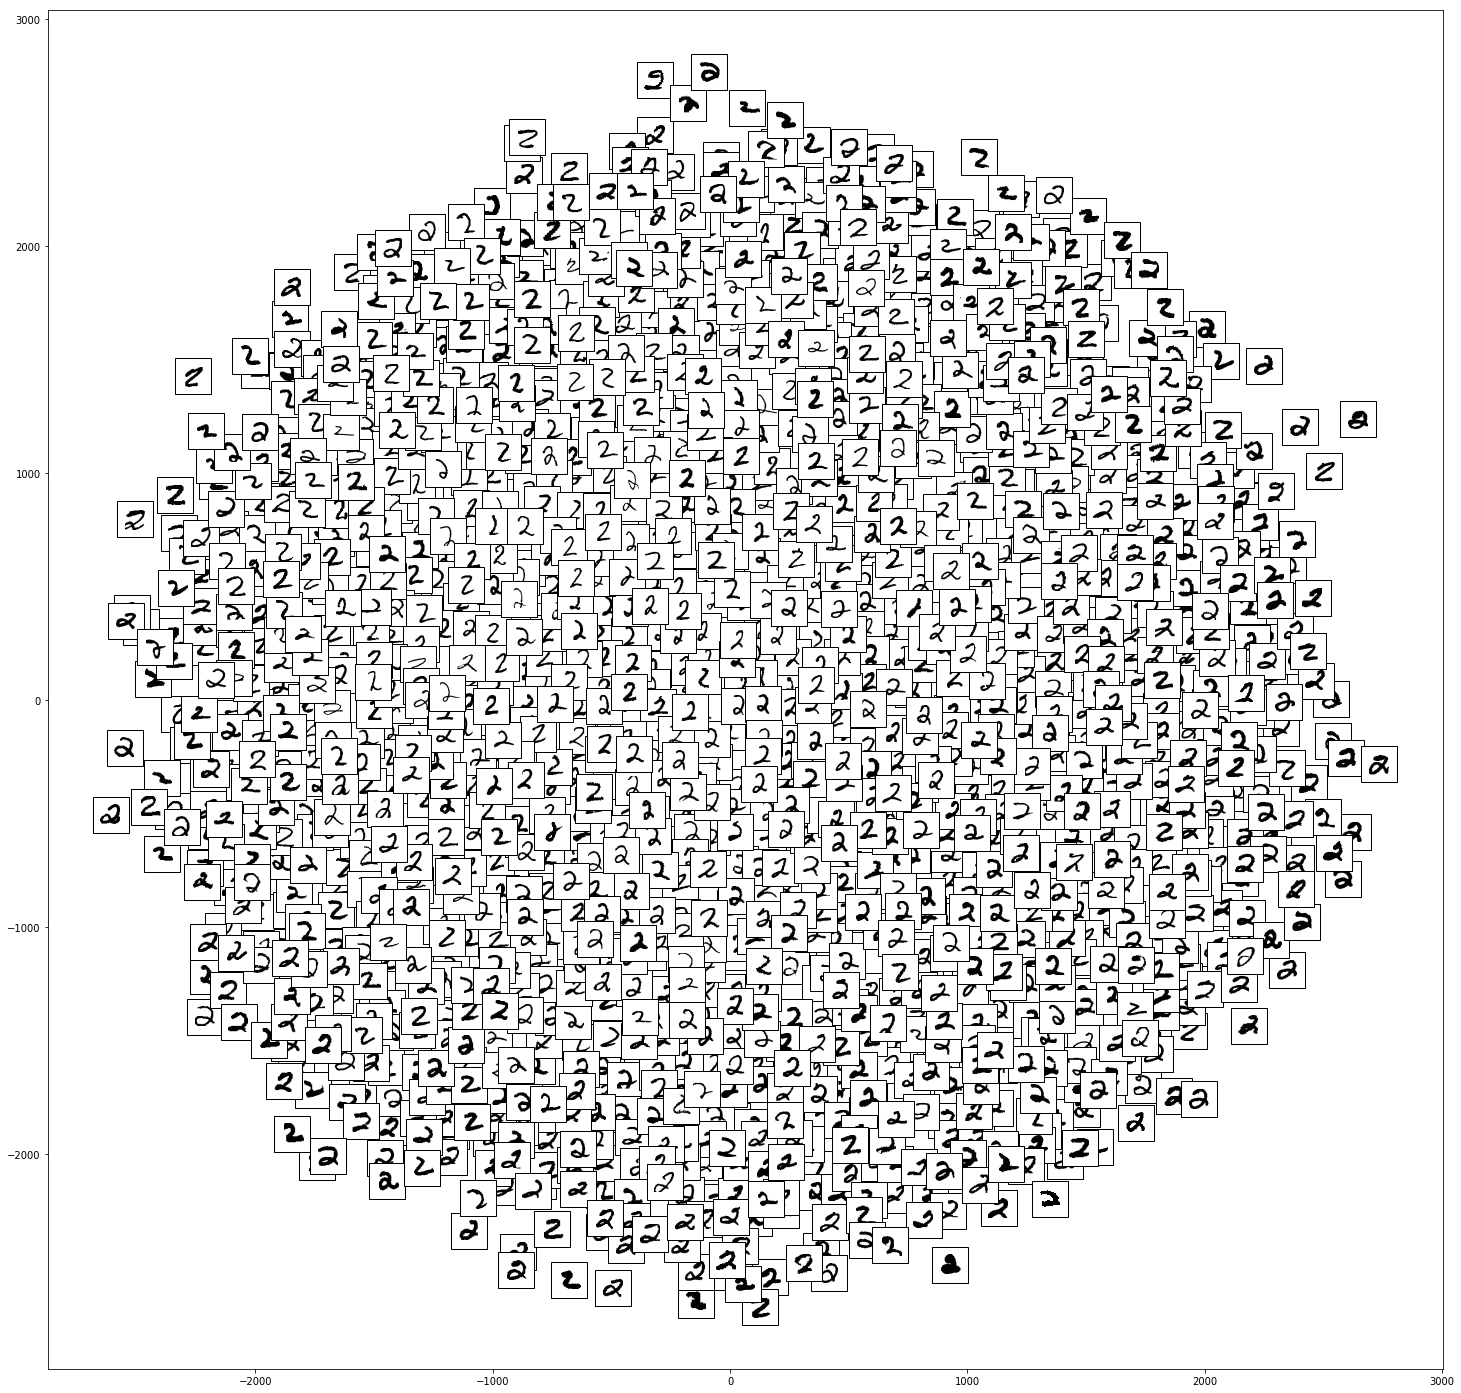

In [8]:
# Plotting all the digits. Might take a while
digit = 2
print "Processing digit ", digit, "\n"
process_digit(digit)

Processing digit  3 

Done. Stress: 10901415453473.789062
x between -2744 2628
y between -2736 2706


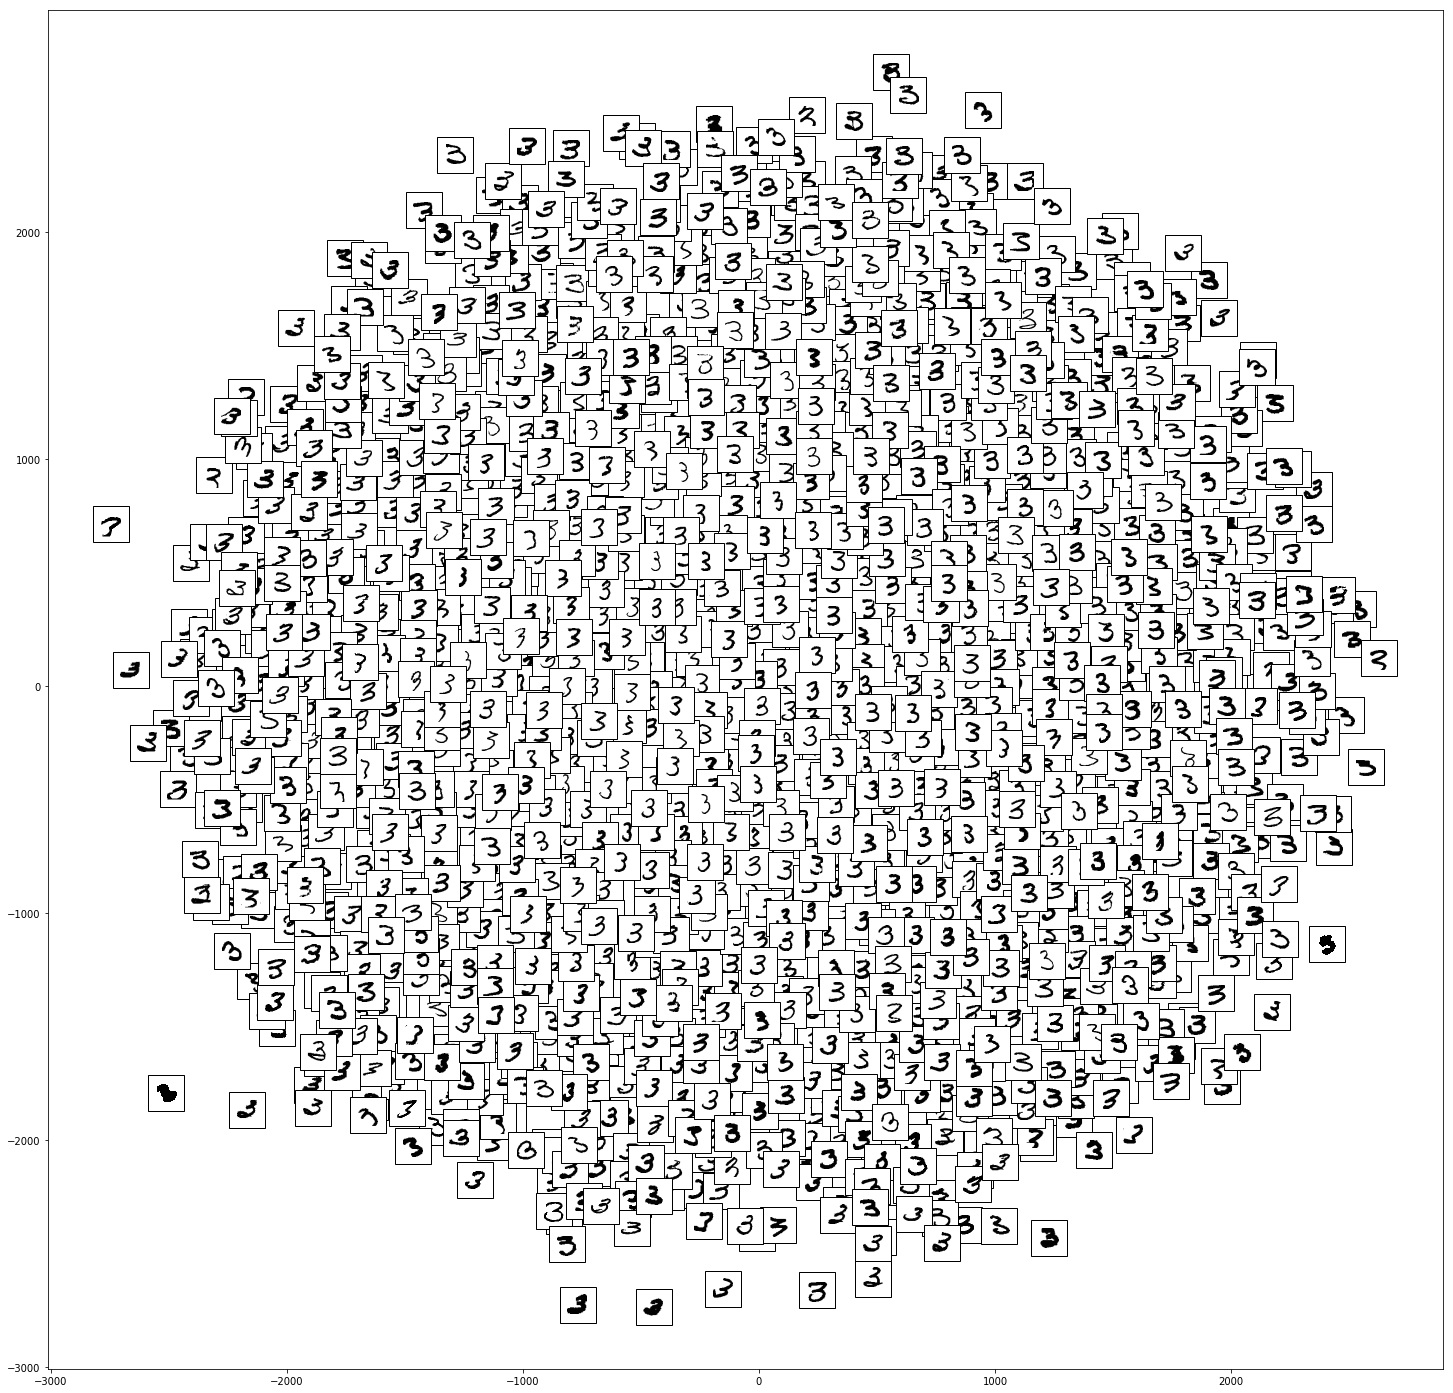

In [9]:
# Plotting all the digits. Might take a while
digit = 3
print "Processing digit ", digit, "\n"
process_digit(digit)

Processing digit  4 

Done. Stress: 10088318655622.703125
x between -2847 3057
y between -2582 2705


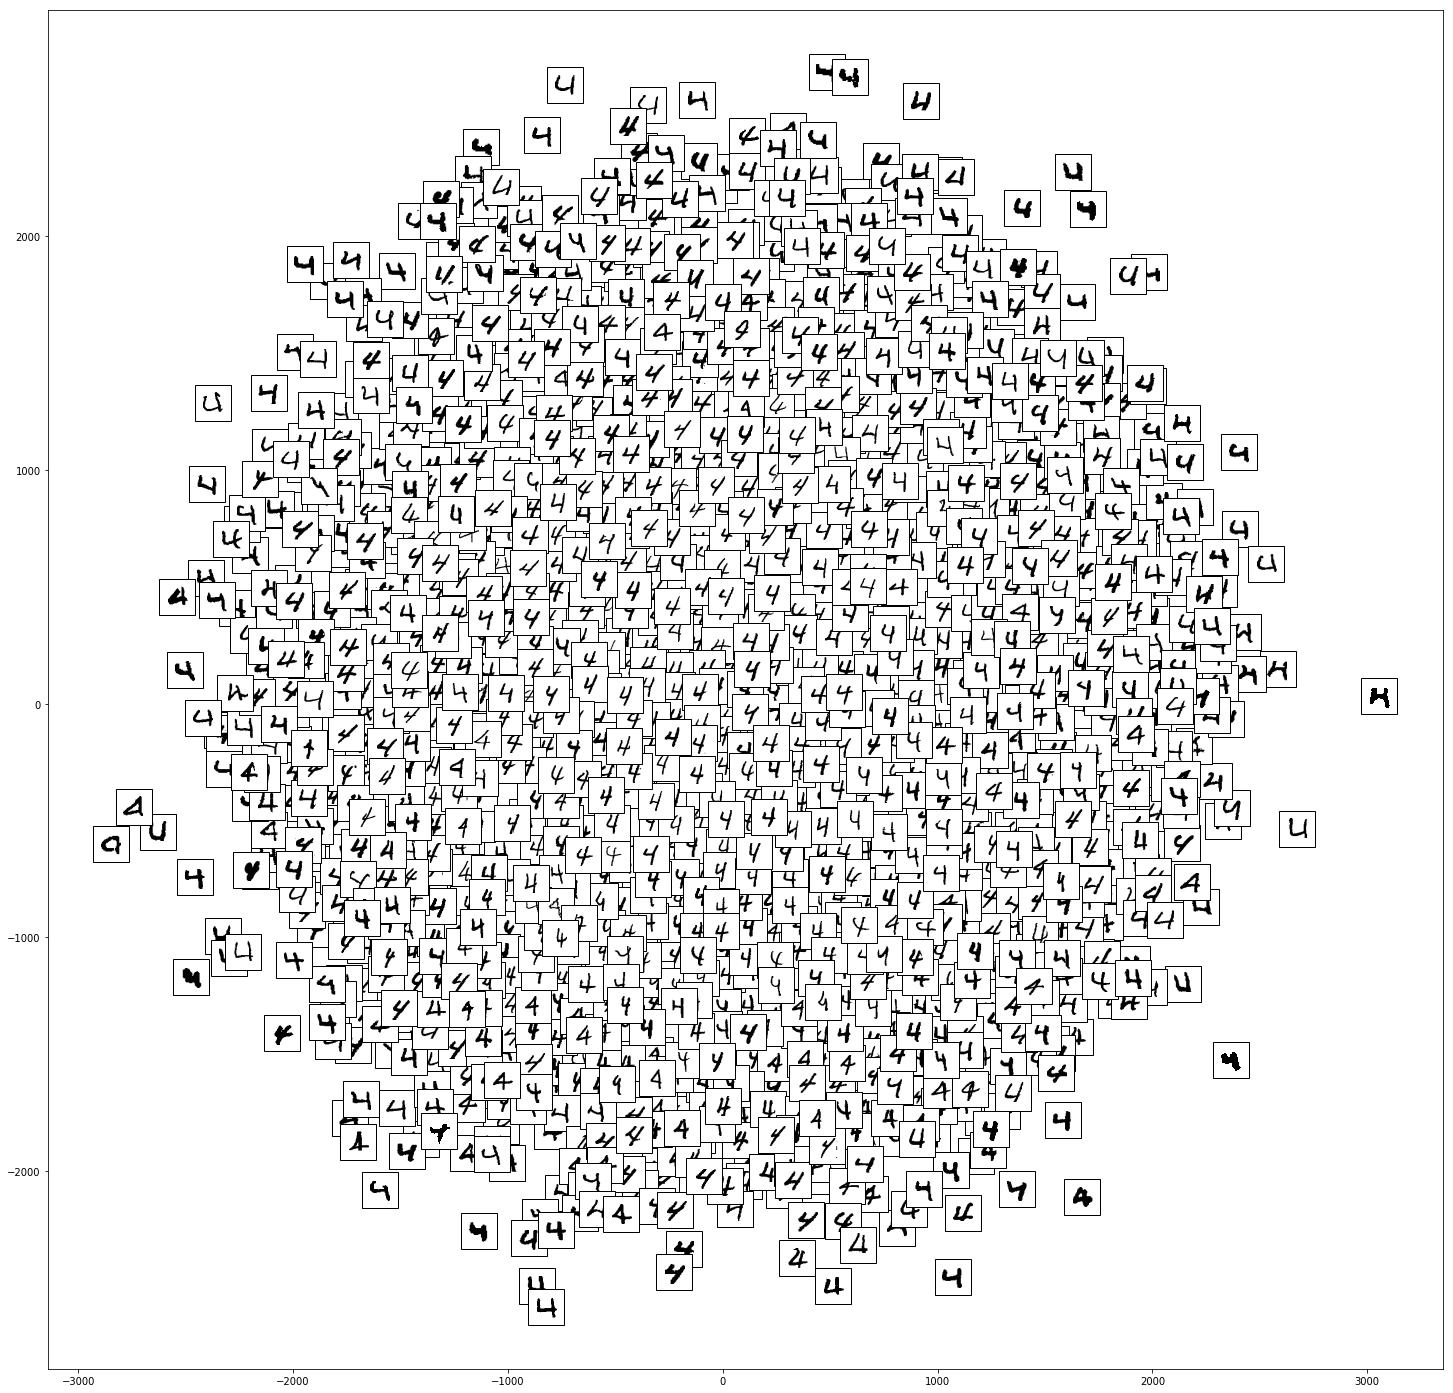

In [10]:
# Plotting all the digits. Might take a while
digit = 4
print "Processing digit ", digit, "\n"
process_digit(digit)

Processing digit  5 

Done. Stress: 11013205566954.617188
x between -2821 2677
y between -2787 2780


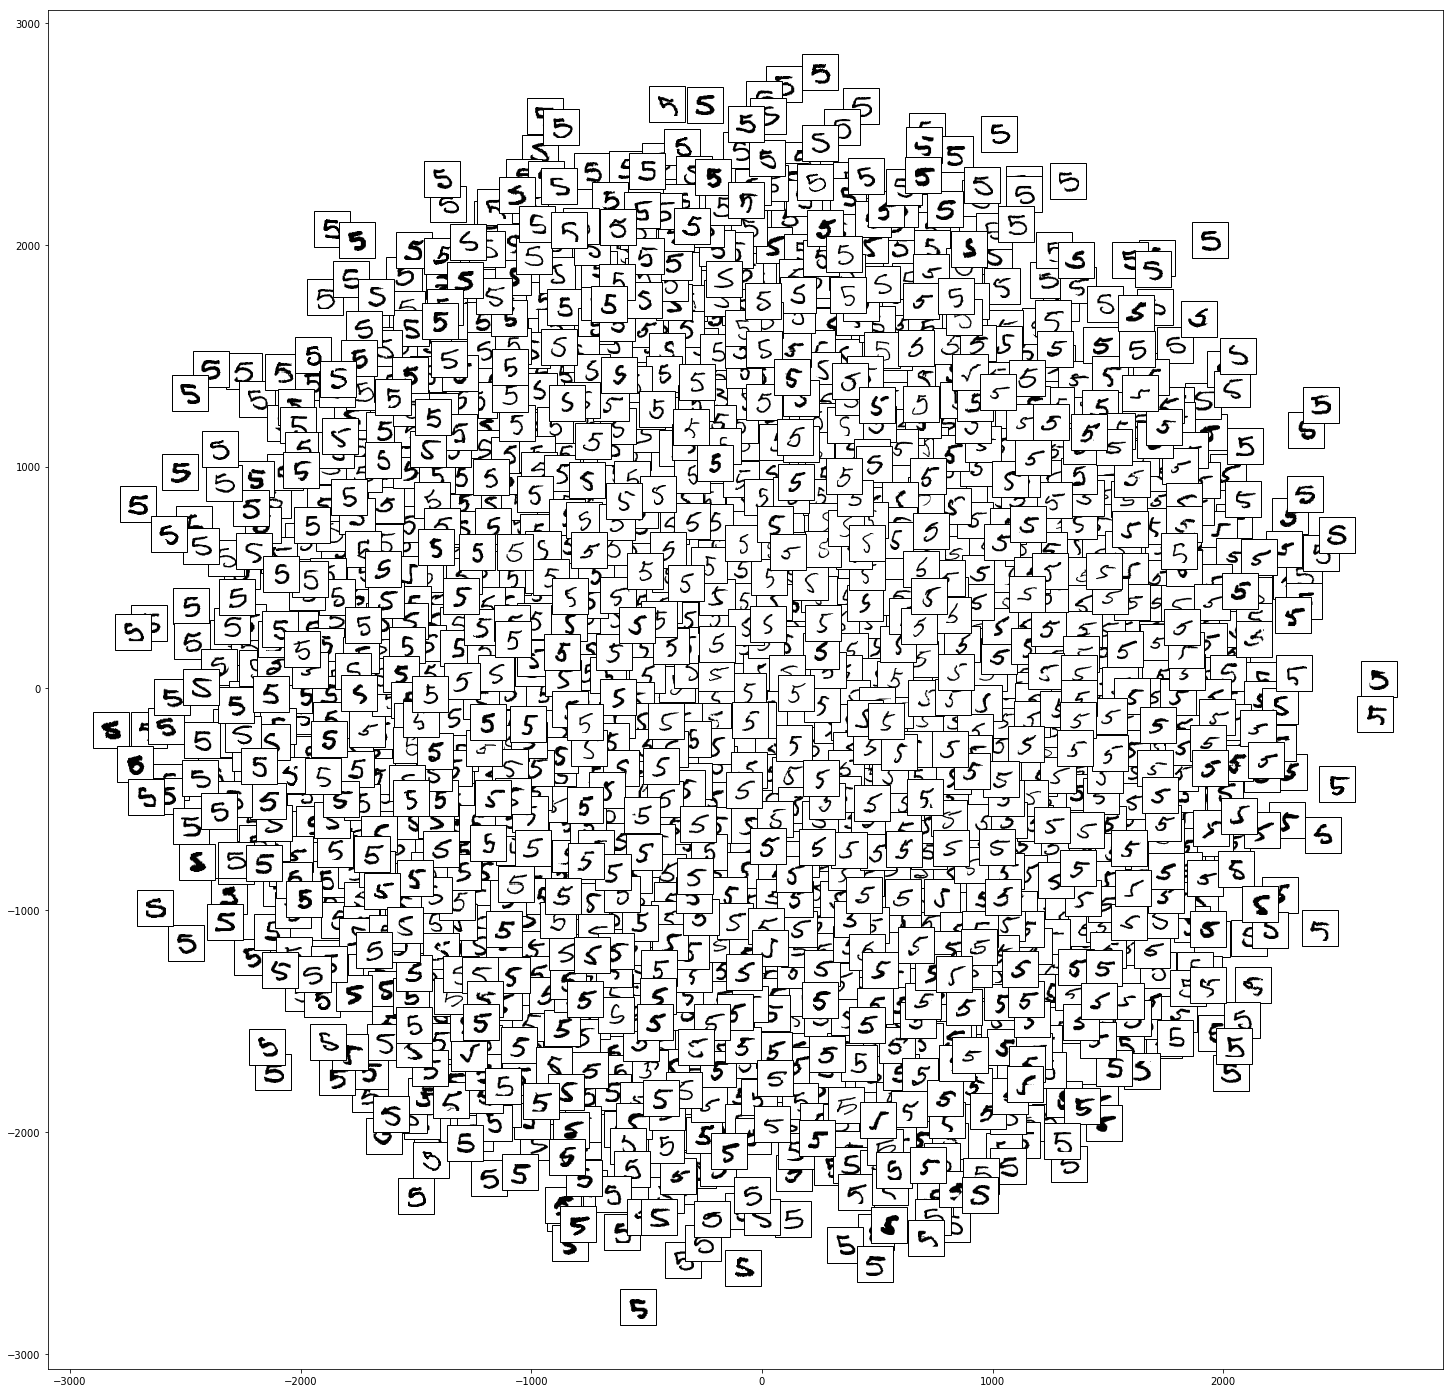

In [11]:
# Plotting all the digits. Might take a while
digit = 5
print "Processing digit ", digit, "\n"
process_digit(digit)

Processing digit  6 

Done. Stress: 8528099192033.825195
x between -2396 2805
y between -2799 2734


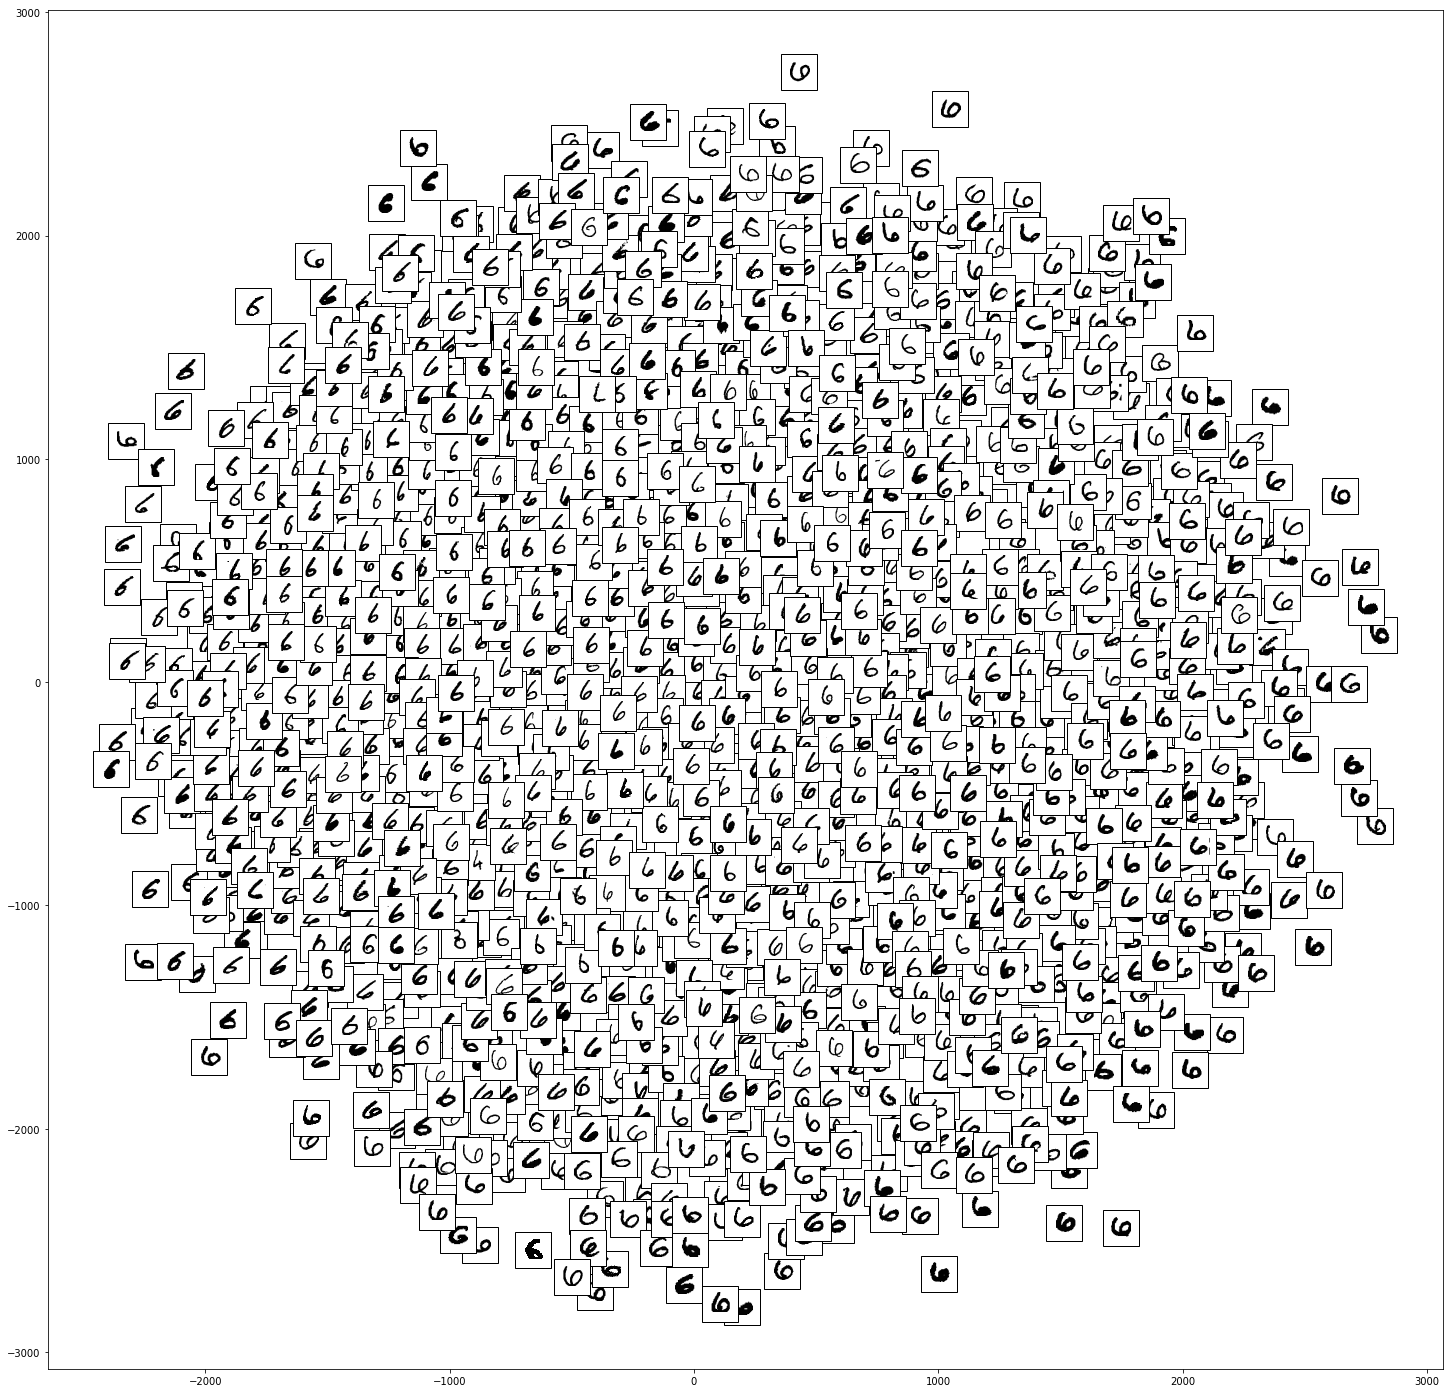

In [12]:
# Plotting all the digits. Might take a while
digit = 6
print "Processing digit ", digit, "\n"
process_digit(digit)

Processing digit  7 

Done. Stress: 6812951971473.420898
x between -2693 2548
y between -2808 2452


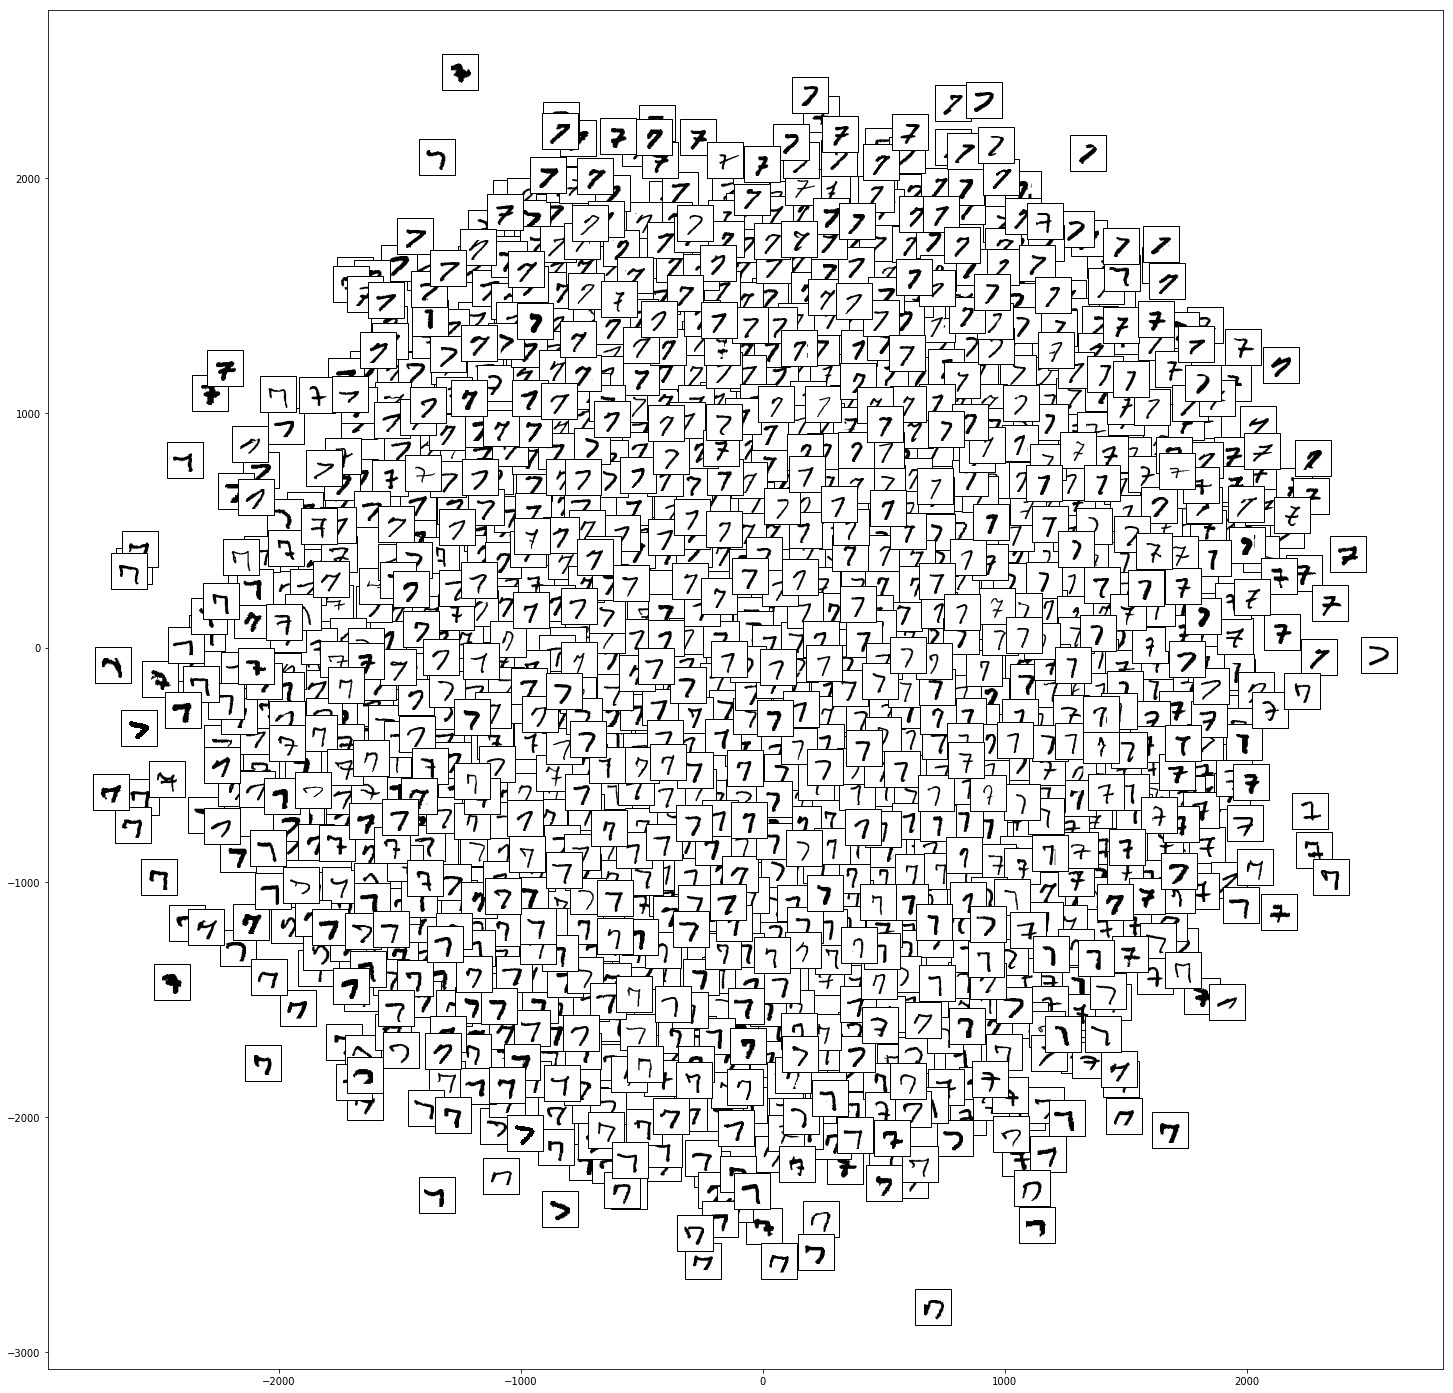

In [13]:
# Plotting all the digits. Might take a while
digit = 7
print "Processing digit ", digit, "\n"
process_digit(digit)

Processing digit  8 

Done. Stress: 10232234016152.806641
x between -3130 2739
y between -2661 2902


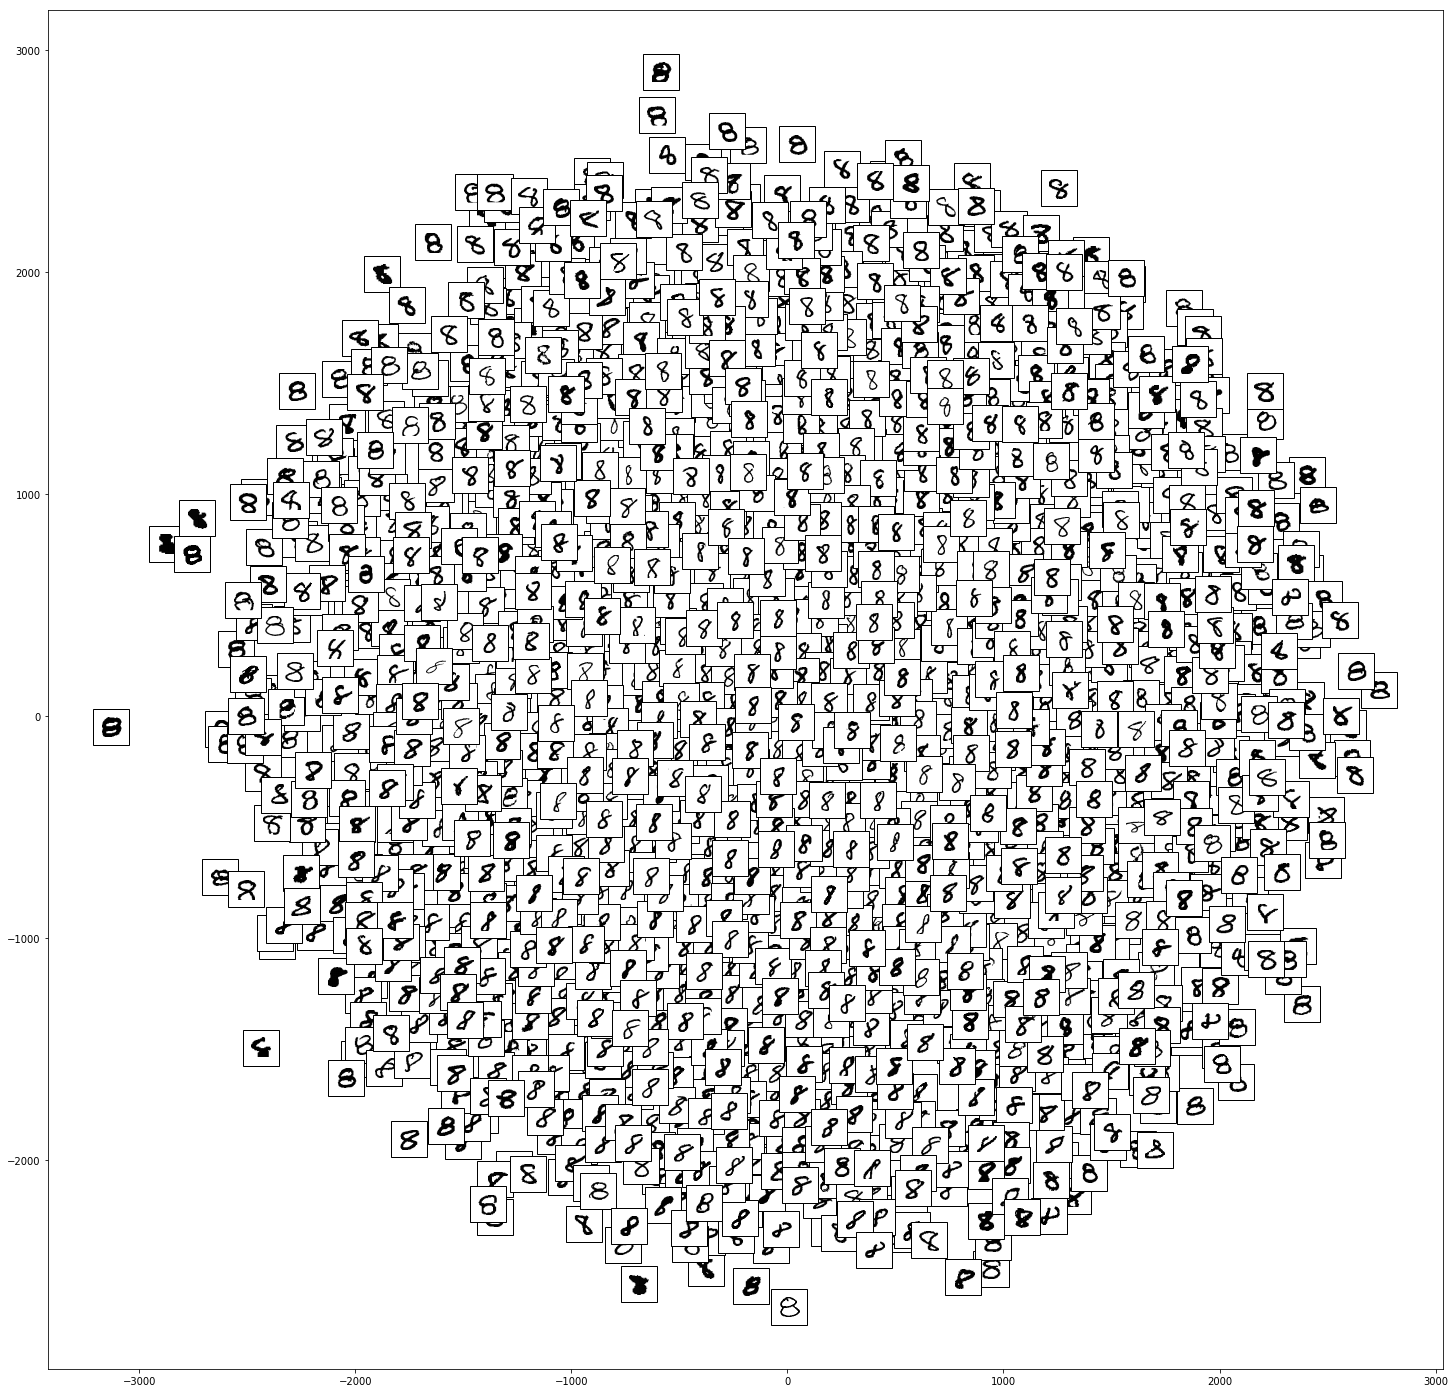

In [14]:
# Plotting all the digits. Might take a while
digit = 8
print "Processing digit ", digit, "\n"
process_digit(digit)

Processing digit  9 

Done. Stress: 7707976186390.541016
x between -2567 3061
y between -2963 2993


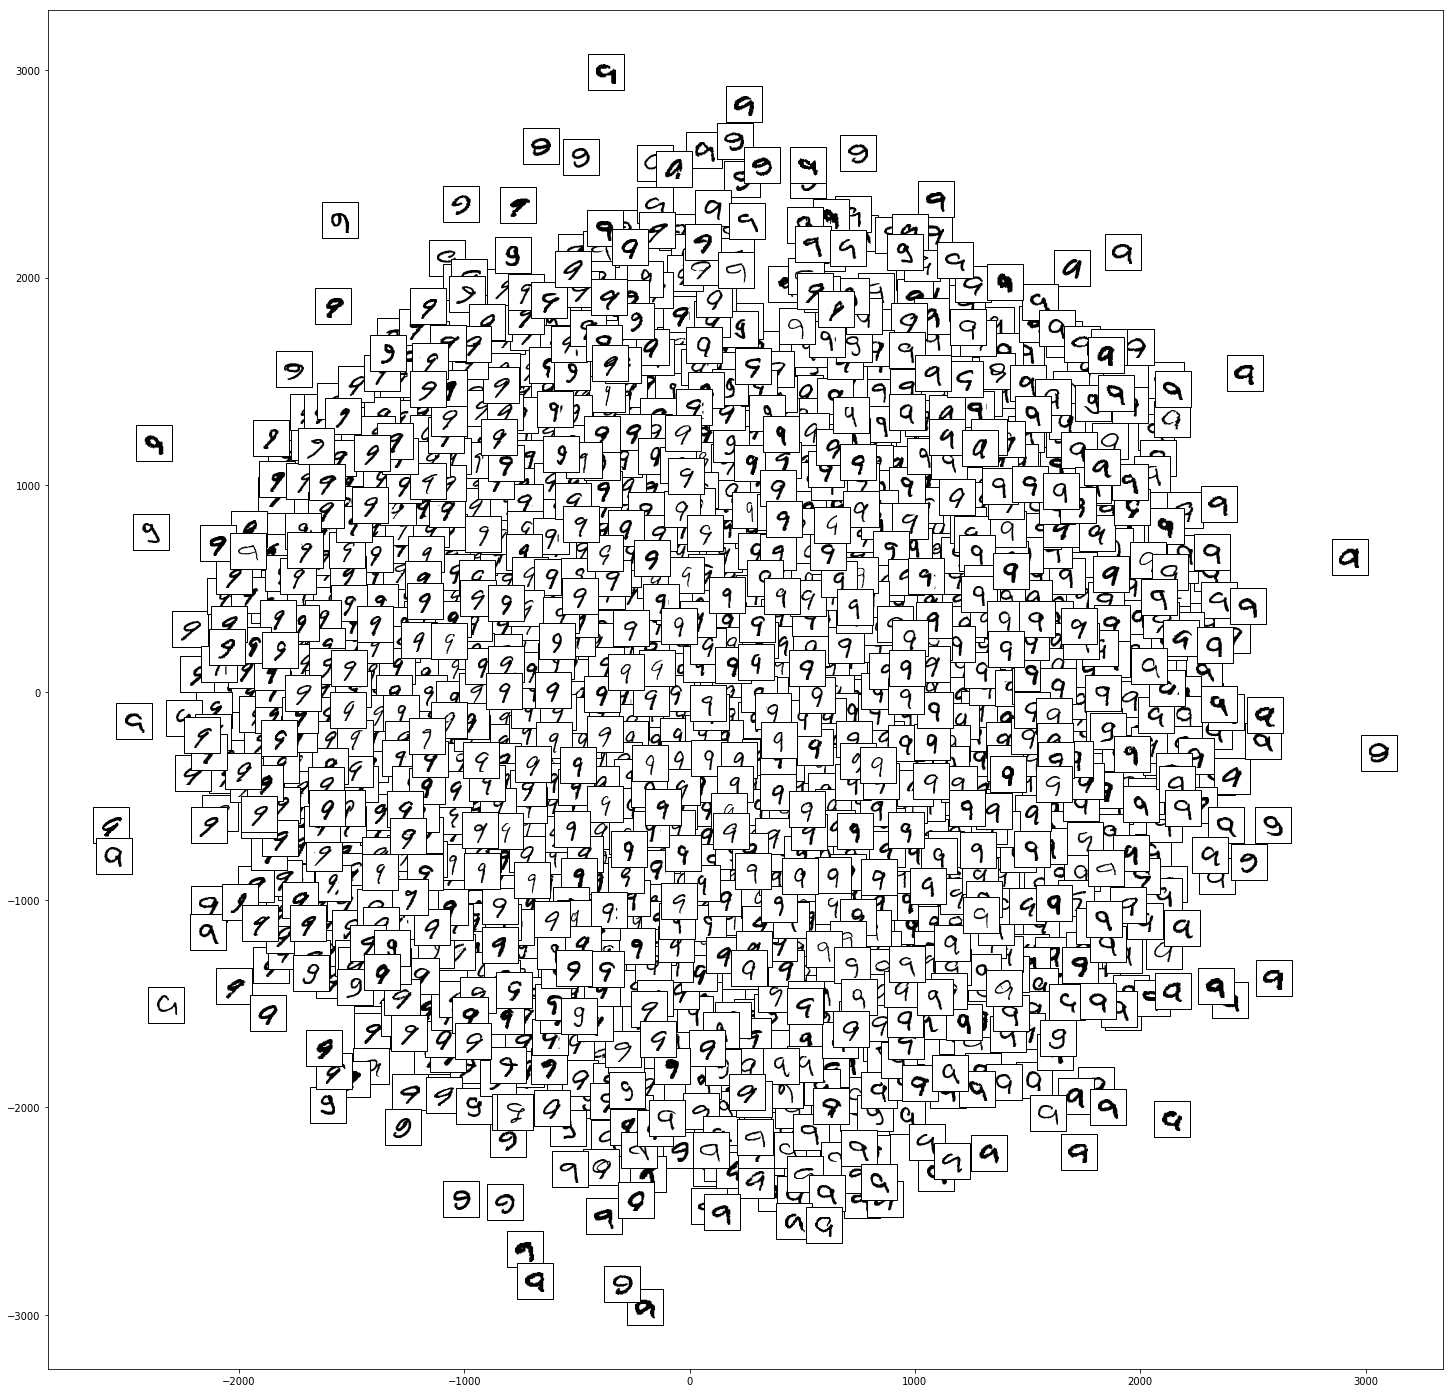

In [15]:
# Plotting all the digits. Might take a while
digit = 9
print "Processing digit ", digit, "\n"
process_digit(digit)

### Projecting original 784-dimensional digits to just two components with MDS we can notice that digits that are alike tend to end up in the same spatial location. The most averagely written digits seem to appear mostly in the center, while the most unusual ones appear as outliers. Also it seems like the digits rotated clockwise appear on the left side while the ones rotated counter-clockwise appear on the right side. Similar "classification" happens with the thickness of the digits. The thicker they are the further away from the center they appear.